Реализуем алгоритм kNN с помощью Python.

In [2]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [3]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

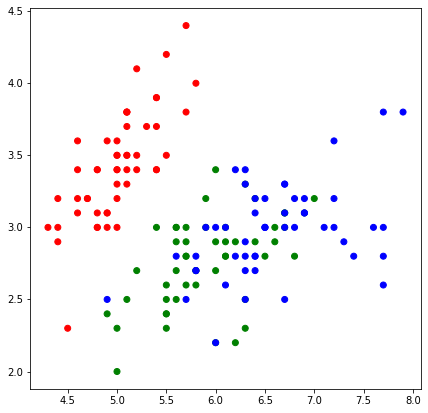

In [8]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)


Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [9]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [10]:
def number_weight(nom, distanse):
  return 1/nom

def distanse_weight(nom, distanse):
  return 0.5**distanse

Реализуем алгоритм поиска k ближайших соседей.

In [15]:
def knn(x_train, y_train, x_test, k, weight_function):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        nom = 0
        for d in sorted(test_distances)[0:k]:
            nom+=1
            classes[d[1]] += 1*(weight_function(nom, d[0]))
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [45]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

**Добавление весов для соседей в зависимости от номера соседа:**

In [98]:
k_numbers = [1,3,5,10,20,30, 40]

In [ ]:
accuracy_number_weight = []

In [53]:
k = 1
weight_function = number_weight
y_pred = knn(X_train, y_train, X_test, k, weight_function)
acc = accuracy(y_pred, y_test)
accuracy_number_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 1: 0.667


Построим график распределения классов.

In [54]:
def get_graph(X_train, y_train, k, weight_functin):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weight_functin)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

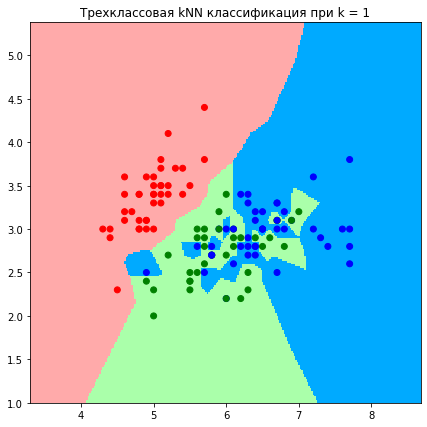

In [55]:
get_graph(X_train, y_train, k, weight_function)

In [59]:
k = 3

y_pred = knn(X_train, y_train, X_test, k, weight_function)

acc = accuracy(y_pred, y_test)
accuracy_number_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 3: 0.667


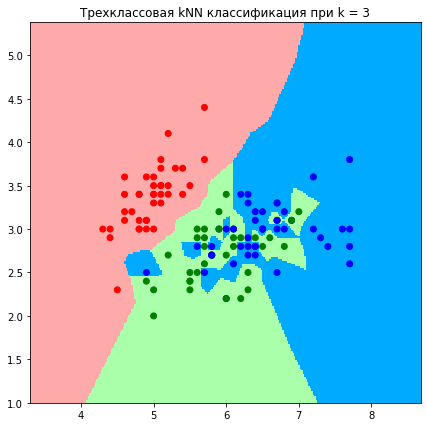

In [60]:
get_graph(X_train, y_train, k, weight_function)

In [61]:
k = 5

y_pred = knn(X_train, y_train, X_test, k, weight_function)

acc = accuracy(y_pred, y_test)
accuracy_number_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 5: 0.733


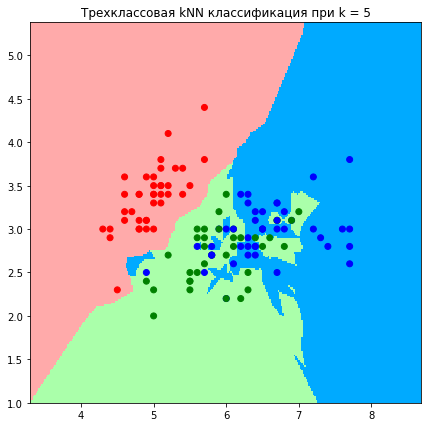

In [62]:
get_graph(X_train, y_train, k, weight_function)

In [63]:
k = 10

y_pred = knn(X_train, y_train, X_test, k, weight_function)

acc = accuracy(y_pred, y_test)
accuracy_number_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 10: 0.767


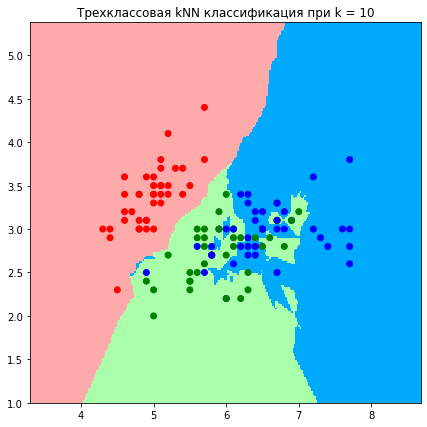

In [64]:
get_graph(X_train, y_train, k, weight_function)

In [65]:
k = 20

y_pred = knn(X_train, y_train, X_test, k, weight_function)

acc = accuracy(y_pred, y_test)
accuracy_number_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 20: 0.800


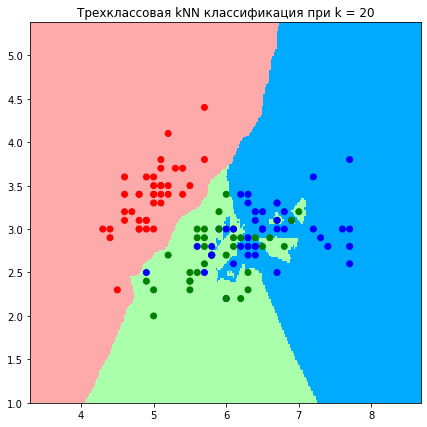

In [66]:
get_graph(X_train, y_train, k, weight_function)

In [67]:
k = 30

y_pred = knn(X_train, y_train, X_test, k, weight_function)

acc = accuracy(y_pred, y_test)
accuracy_number_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 30: 0.833


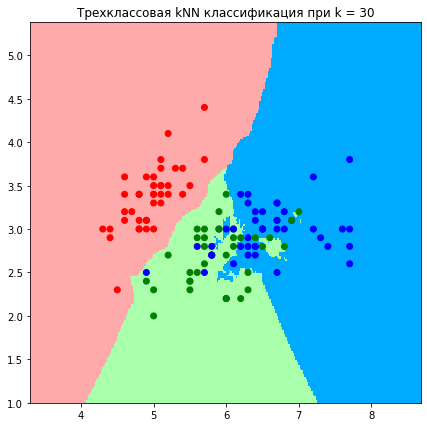

In [68]:
get_graph(X_train, y_train, k, weight_function)

In [69]:
k = 40

y_pred = knn(X_train, y_train, X_test, k, weight_function)

acc = accuracy(y_pred, y_test)
accuracy_number_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 40: 0.833


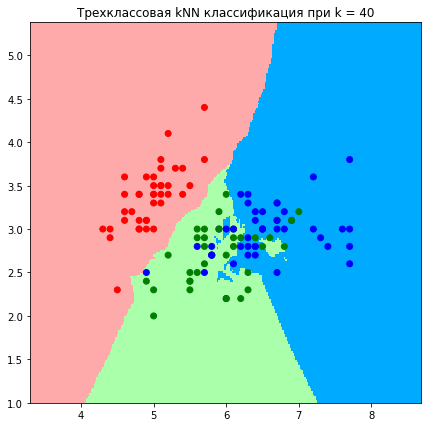

In [71]:
get_graph(X_train, y_train, k, weight_function)

**Добавление весов для соседей в зависимости от расстояния до соседа:**

In [79]:
accuracy_distanse_weight = []

In [80]:
k = 1
weight_function = distanse_weight
y_pred = knn(X_train, y_train, X_test, k, weight_function)
acc = accuracy(y_pred, y_test)
accuracy_distanse_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 1: 0.667


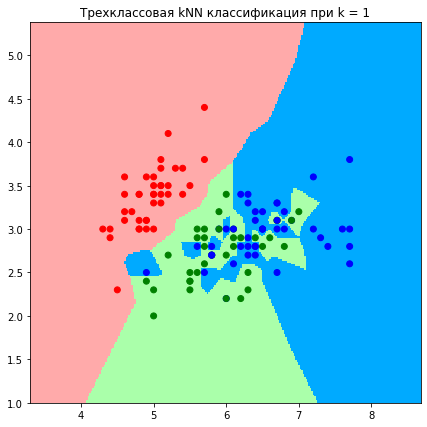

In [81]:
get_graph(X_train, y_train, k, weight_function)

In [82]:
k = 3
y_pred = knn(X_train, y_train, X_test, k, weight_function)
acc = accuracy(y_pred, y_test)
accuracy_distanse_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 3: 0.733


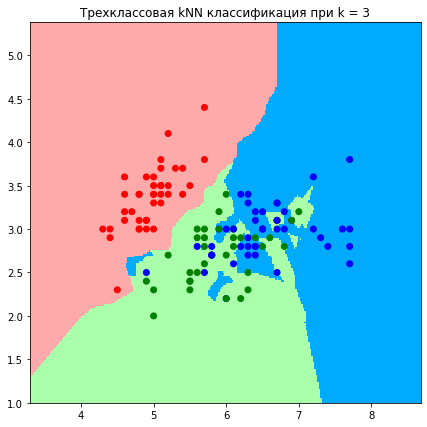

In [83]:
get_graph(X_train, y_train, k, weight_function)

In [84]:
k = 5
y_pred = knn(X_train, y_train, X_test, k, weight_function)
acc = accuracy(y_pred, y_test)
accuracy_distanse_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 5: 0.867


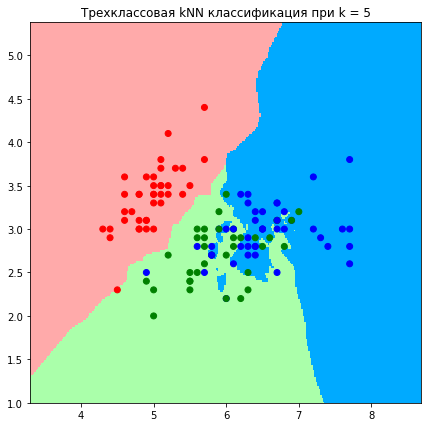

In [85]:
get_graph(X_train, y_train, k, weight_function)

In [86]:
k = 10
y_pred = knn(X_train, y_train, X_test, k, weight_function)
acc = accuracy(y_pred, y_test)
accuracy_distanse_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 10: 0.867


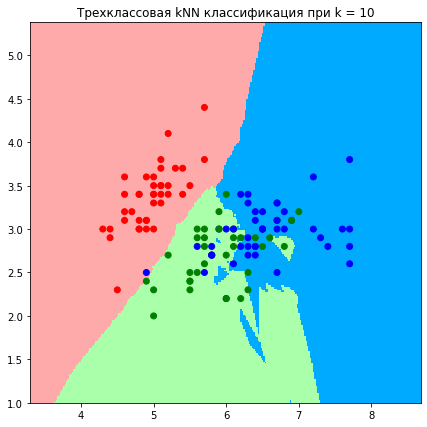

In [87]:
get_graph(X_train, y_train, k, weight_function)

In [88]:
k = 20
y_pred = knn(X_train, y_train, X_test, k, weight_function)
acc = accuracy(y_pred, y_test)
accuracy_distanse_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 20: 0.833


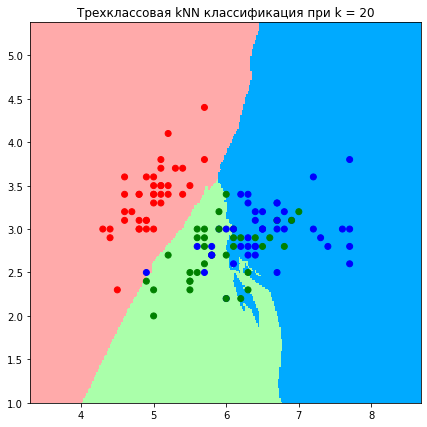

In [89]:
get_graph(X_train, y_train, k, weight_function)

In [90]:
k = 30
y_pred = knn(X_train, y_train, X_test, k, weight_function)
acc = accuracy(y_pred, y_test)
accuracy_distanse_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 30: 0.833


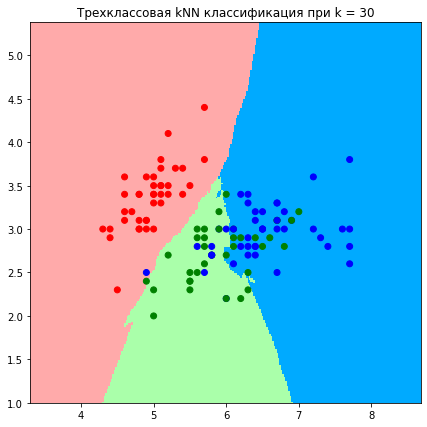

In [91]:
get_graph(X_train, y_train, k, weight_function)

In [92]:
k = 40
y_pred = knn(X_train, y_train, X_test, k, weight_function)
acc = accuracy(y_pred, y_test)
accuracy_distanse_weight.append(acc)
print(f'Точность алгоритма при k = {k}: {acc:.3f}')

Точность алгоритма при k = 40: 0.767


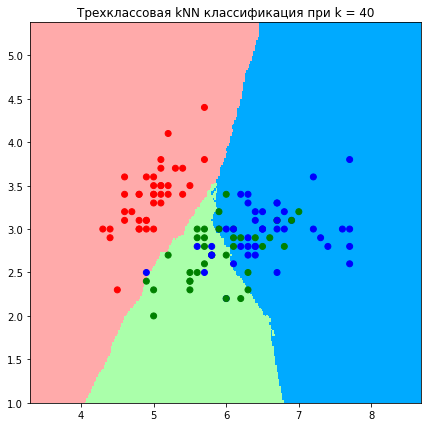

In [93]:
get_graph(X_train, y_train, k, weight_function)

**Для метода, в котором используются веса, зависящие от расстояния, при малых k результируюая гиперплоскость говорит о том, что модель слишком подстроена под выбросы.**

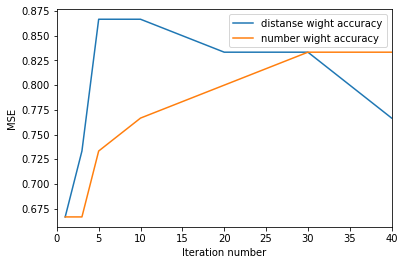

In [104]:
import matplotlib.pyplot as plt
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, k_numbers[-1])
plt.plot(k_numbers, accuracy_distanse_weight, label='distanse wight accuracy')
plt.plot(k_numbers, accuracy_number_weight, label='number wight accuracy')
plt.legend(loc='upper right')
plt.show()

**Исходя из графика, можно сделать вывод, что для модели, в которой используются веса в зависимости от номера соседа, оптимальное число соседей  - 30. Для метода, где веса зависят от расстояния - оптимальное k = 5.**
